# Multivariate Regression Analysis

This Jupyter Notebook performs a comprehensive multivariate regression analysis on a dataset to predict a continuous target variable based on multiple features. The dataset, sourced from [source, e.g., Kaggle], includes various predictors related to [context, e.g., housing characteristics, medical measurements, etc.]. The analysis involves data exploration, model construction, and evaluation to assess the predictive power of the model.

## Sections:

### 1. Exploratory Data Analysis (EDA)
In this section, we explore the dataset's structure, summary statistics, and key visualizations. This step is crucial for understanding the distribution of features, identifying potential outliers, and discerning relationships between variables. Key activities include:

- Loading and cleaning the dataset
- Descriptive statistics
- Visualizations: histograms, scatter plots, and correlation matrices

### 2. Outlier Exploration
Outliers can significantly impact regression models. Here, we identify and address outliers to improve model performance. This section covers:

- Detection of outliers using statistical methods (e.g., Z-scores, IQR)
- Visualizing outliers using boxplots and scatter plots

### 3. Train-Test Split and Model Fitting
We split the dataset into training and testing sets to evaluate the model's performance on unseen data. This section includes:

- Splitting the data into training and testing sets
- Fitting a multiple linear regression model to the training data
- Evaluating the model on the test data using metrics such as R-squared and Mean Squared Error (MSE)

### 4. Assumption Checking
Regression models rely on several key assumptions. This section checks these assumptions to validate the model:

- Linearity: Plotting residuals vs. predicted values
- Homoscedasticity: Checking for constant variance of residuals
- Normality: Assessing the distribution of residuals using Q-Q plots
- Multicollinearity: Evaluating VIF (Variance Inflation Factor) scores

### 5. Next Steps: Q-Q Plots and Feature Engineering
Based on the assumption checking, we identify areas for improvement. This section outlines:

- Creating Q-Q plots to further investigate the normality of residuals
- Feature engineering techniques to enhance model performance, such as creating interaction terms, polynomial features, or transforming existing features

This notebook aims not only to predict the target variable but also to showcase proficiency in applying various regression techniques for predictive modeling in a multivariate context.


In [35]:
#imports
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [385]:
# Suppress warnings if any. Purely cosmetic for portfolio projecs.
# Some modules may not be up to date and can give deprecation warnings.

warnings.filterwarnings("ignore")

In [387]:
# Load the data
data = pd.read_csv('C:/Users/Brent/Documents/Python/Portfolio_Projects/Housing Analysis/AmesHousing.csv')

# Exploratory Data Analysis (EDA)

## Introduction
In this section, we perform Exploratory Data Analysis to gain insights into the dataset. We start by loading the data and examining its structure, followed by an exploration of data types and the presence of missing values.

## Data Loading
We begin by loading the dataset into our analysis environment. 

The dataset used in this analysis is the Ames Housing dataset, sourced from Kaggle. This dataset contains information about various attributes of residential homes in Ames, Iowa. It was compiled by Dean De Cock for use in data science education and research.

The dataset comprises a wide range of features related to residential properties, including:
- Property characteristics such as square footage, number of rooms, and lot size.
- Location attributes such as neighborhood and proximity to amenities.
- Building and structural features such as construction year, foundation type, and exterior material.
- Sale-related information such as sale price, sale type, and sale condition.

The dataset provides a comprehensive view of residential properties in the Ames area. This analysis aims to explore the relationships between these features and the sale price of homes, ultimately building a predictive model for housing prices.


In [389]:
# Get basic information about the dataset
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 39 columns]

In [391]:
data.head(25)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0       1  526301100           20        RL         141.0     31770   Pave   
1       2  526350040           20        RH          80.0     11622   Pave   
2       3  526351010           20        RL          81.0     14267   Pave   
3       4  526353030           20        RL          93.0     11160   Pave   
4       5  527105010           60        RL          74.0     13830   Pave   
5       6  527105030           60        RL          78.0      9978   Pave   
6       7  527127150          120        RL          41.0      4920   Pave   
7       8  527145080          120        RL          43.0      5005   Pave   
8       9  527146030          120        RL          39.0      5389   Pave   
9      10  527162130           60        RL          60.0      7500   Pave   
10     11  527163010           60        RL          75.0     10000   Pave   
11     12  527165230           20        RL           NaN      7980   Pave   
12     13  527166040           60        RL          63.0      8402   Pave   
13     14  527180040           20        RL          85.0     10176   Pave   
14     15  527182190          120        RL           NaN      6820   Pave   
15     16  527216070           60        RL          47.0     53504   Pave   
16     17  527225035           50        RL         152.0     12134   Pave   
17     18  527258010           20        RL          88.0     11394   Pave   
18     19  527276150           20        RL         140.0     19138   Pave   
19     20  527302110           20        RL          85.0     13175   Pave   
20     21  527358140           20        RL         105.0     11751   Pave   
21     22  527358200           85        RL          85.0     10625   Pave   
22     23  527368020           60        FV           NaN      7500   Pave   
23     24  527402200           20        RL           NaN     11241   Pave   
24     25  527402250           20        RL           NaN     12537   Pave   

   Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0    NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1    NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2    NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3    NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4    NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
5    NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
6    NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
7    NaN       IR1          HLS  ...         0     NaN    NaN          NaN   
8    NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
9    NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
10   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
11   NaN       IR1          Lvl  ...         0     NaN  GdPrv         Shed   
12   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
13   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
14   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
15   NaN       IR2          HLS  ...         0     NaN    NaN          NaN   
16   NaN       IR1          Bnk  ...         0     NaN    NaN          NaN   
17   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
18   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
19   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
20   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
21   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
22   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
23   NaN       IR1          Lvl  ...         0     NaN    NaN         Shed   
24   NaN       IR1       

In [11]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

# Missing Values Exploration

We must now look for missing values. The code below checks for them and totals the NaNs by column. As we can see, there are many missing values across several of the columns.

Now, let's address missing values in the dataset. The following code checks for missing values and calculates the total count of NaN values for each column. As observed, there are numerous missing values spread across several columns.


In [393]:
# Check for missing values
# Sum them and the present the sums per column
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

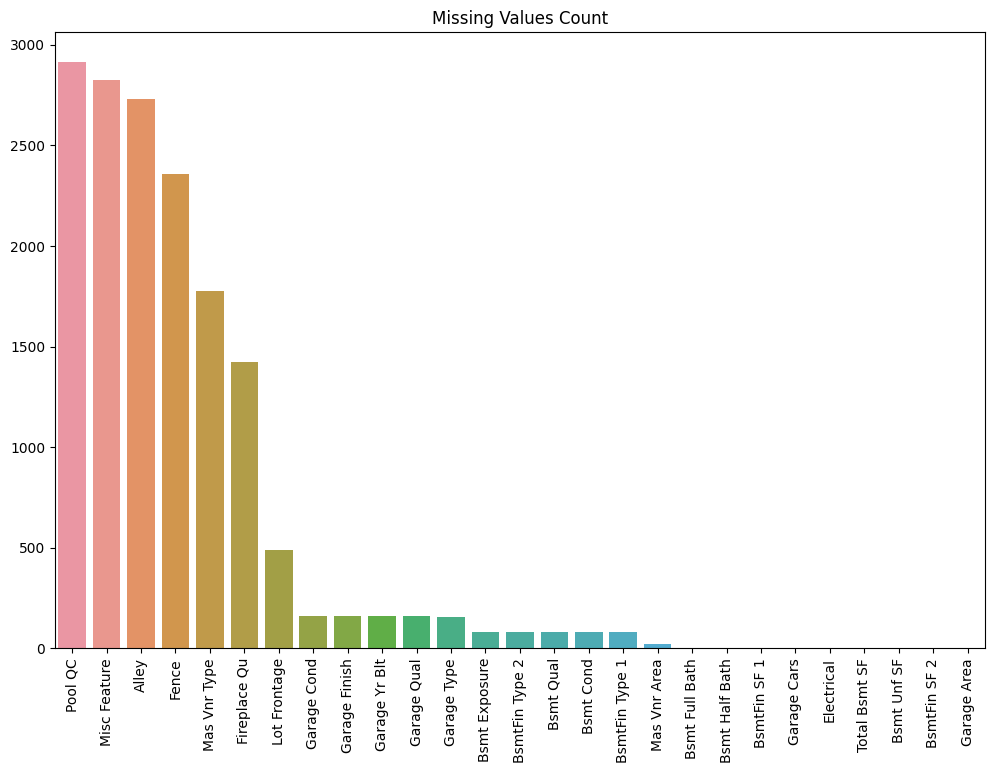

In [395]:
# Barplot for missing data
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90)
plt.title('Missing Values Count')
plt.show()


# Deal with missing values

## Impute Categorical Variables
- Fill missing values in categorical columns such as 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type', 'Fireplace Qu', 'Garage Type', 'Garage Cond', 'Garage Finish', 'Garage Qual', and 'Bsmt Exposure' with appropriate placeholders like 'NA' or 'None'.

## Impute Numeric Variables
- Fill missing values in the 'Lot Frontage' column with the mean value.
- Create a new binary column 'Has Garage' indicating whether a property has a garage.
- For properties with a garage, impute missing values in the 'Garage Yr Blt' column with the 'Year Built' value. For properties without a garage, impute missing values in the 'Garage Yr Blt' column with the median value of 'Garage Yr Blt'.


In [402]:
#Deal with missing values.
data['Pool QC'].fillna('NA', inplace=True)
data['Misc Feature'].fillna('AS', inplace=True)
data['Alley'].fillna('NA', inplace=True)
data['Fence'].fillna('NA', inplace=True)
data['Mas Vnr Type'].fillna('None', inplace=True)
data['Fireplace Qu'].fillna('None', inplace=True)
data['Garage Type'].fillna('None', inplace=True)
data['Garage Cond'].fillna('NA', inplace=True)
data['Garage Finish'].fillna('NA', inplace=True)
data['Garage Qual'].fillna('NA', inplace=True)
data['Bsmt Exposure'].fillna('No', inplace=True)  
mean_lot_frontage = data['Lot Frontage'].mean()
data['Lot Frontage'].fillna(mean_lot_frontage, inplace=True)

# Impute missing values based on garage existence
data['Has Garage'] = data['Garage Type'].notnull()
median_garage_year_built = data['Garage Yr Blt'].median()
data.loc[data['Has Garage'], 'Garage Yr Blt'].fillna(data['Year Built'], inplace=True)
data.loc[~data['Has Garage'], 'Garage Yr Blt'].fillna(median_garage_year_built, inplace=True)
data.drop(columns=['Has Garage'], inplace=True)


# Exploring Missing Values

To handle missing values in the 'Lot Frontage' column, we first filter out NaN values and plot the histogram of non-missing values to visualize the distribution. Additionally, we impute missing values with the median value of the column. We perform a similar operation for the Garage Year Built feature as well.



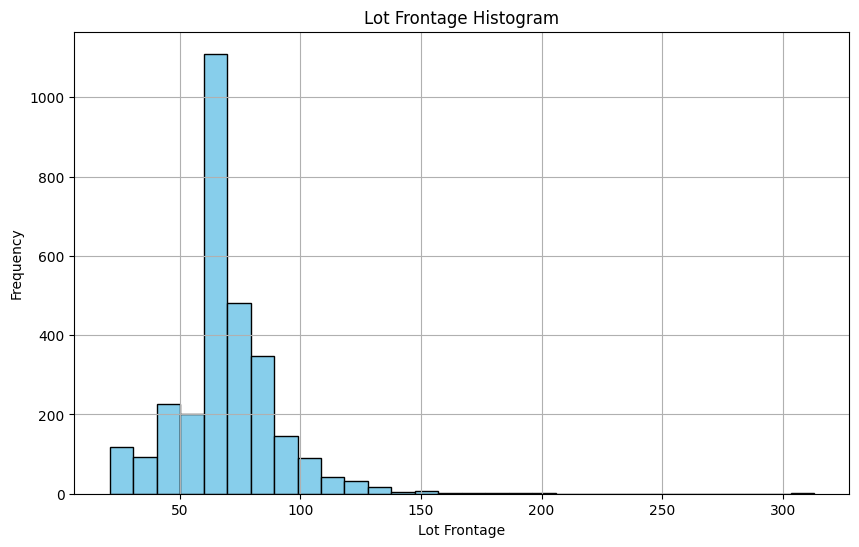

In [308]:
# Just in case: Filter out NaN values from the 'Lot Frontage' column
# Plot results
lot_frontage_without_nan = data['Lot Frontage'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(lot_frontage_without_nan, bins=30, color='skyblue', edgecolor='black')
plt.title('Lot Frontage Histogram')
plt.xlabel('Lot Frontage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [310]:
median_lot_frontage = data['Lot Frontage'].median()
data['Lot Frontage'].fillna(median_lot_frontage, inplace=True)


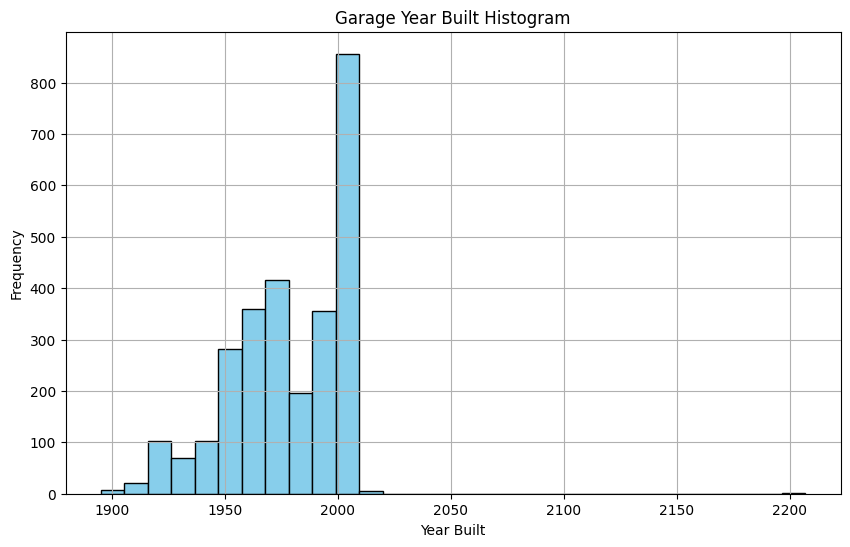

In [312]:
# Just in case: Filter out NaN values from the 'Garage Yr Blt' column
# Plot data
garage_year_built_without_nan = data['Garage Yr Blt'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(garage_year_built_without_nan, bins=30, color='skyblue', edgecolor='black')
plt.title('Garage Year Built Histogram')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Handling Missing Values: Imputation Strategies

To ensure accurate analysis, missing values in the dataset are addressed using the following strategies:

- For properties with a garage, if the year the garage was built ('Garage Yr Blt') is missing, it is imputed with the year the property was built ('Year Built').
- Various basement-related attributes such as finish type, condition, and quality are imputed based on the most common values observed in properties with basements.
- Missing values in 'Mas Vnr Area' (Masonry Vener Area) are filled with 0, indicating no masonry veneer present.
- The 'Electrical' system attribute is imputed with the most common type observed in the dataset.
- Certain numerical attributes related to basement and garage features are imputed with the rounded mean value to maintain consistency and accuracy in the dataset.

These imputation strategies ensure that missing data is handled appropriately and does not compromise the integrity of the analysis and modeling process.


In [410]:
data['Has Garage'] = data['Garage Type'].notnull()
median_garage_year_built = data['Garage Yr Blt'].median()
data.loc[data['Has Garage'] & data['Garage Yr Blt'].isnull(), 'Garage Yr Blt'] = data.loc[data['Has Garage'] & data['Garage Yr Blt'].isnull(), 'Year Built'].values
data.drop(columns=['Has Garage'], inplace=True)

# Check if the property has a basement
data['Has Basement'] = (data['Bsmt Qual'].notnull()) & (data['Bsmt Cond'].notnull())

# Replace NaNs in 'BsmtFin Type 2' and 'BsmtFin Type 1' with the most common value if the house has a basement, otherwise replace with 'NA'
most_common_bsmtfin_type_2 = data.loc[data['Has Basement'], 'BsmtFin Type 2'].mode()[0]
most_common_bsmtfin_type_1 = data.loc[data['Has Basement'], 'BsmtFin Type 1'].mode()[0]
most_common_bsmt_cond = data.loc[data['Has Basement'], 'Bsmt Cond'].mode()[0]
most_common_bsmt_qual = data.loc[data['Has Basement'], 'Bsmt Qual'].mode()[0]

data.loc[data['Has Basement'], 'Bsmt Cond'].fillna(most_common_bsmt_cond, inplace=True)
data.loc[data['Has Basement'], 'Bsmt Qual'].fillna(most_common_bsmt_qual, inplace=True)
data.loc[data['Has Basement'], 'BsmtFin Type 2'].fillna(most_common_bsmtfin_type_2, inplace=True)
data.loc[data['Has Basement'], 'BsmtFin Type 1'].fillna(most_common_bsmtfin_type_1, inplace=True)
data.loc[~data['Has Basement'], ['BsmtFin Type 2', 'BsmtFin Type 1']] = 'NA'
data.loc[~data['Has Basement'], ['Bsmt Cond', 'Bsmt Qual']] = 'NA'

data.drop(columns=['Has Basement'], inplace=True)

data['Mas Vnr Area'].fillna(0, inplace=True)
# For categorical columns, replace NaNs with the most subordinate option
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)
data['BsmtFin Type 2'].fillna('NA', inplace=True)

# For numerical columns, replace NaNs with the rounded mean
numerical_columns = ["Bsmt Full Bath", "Bsmt Half Bath", "Garage Cars", "Total Bsmt SF", "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1", "Garage Area"]
for col in numerical_columns:
    mean_value = round(data[col].mean())
    data[col].fillna(mean_value, inplace=True)

# Missing Values Check

No missing values were found in the dataset after performing the check.


In [420]:
# Check for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

# Handling Infinite Values

The dataset has been processed to convert any non-numeric values to NaN (Not a Number). Additionally, a check for infinite values (inf) has been conducted.

In [320]:
data_numeric = data.apply(pd.to_numeric, errors='coerce') #Convert any non-numerics to NaN
inf_mask = np.isinf(data_numeric) #Create boolean mask for inf values
inf_counts = inf_mask.sum().sort_values(ascending=False) # Filter columns lacking infs
inf_counts = inf_counts[inf_counts > 0] # Count infs

inf_counts

Series([], dtype: int64)

# Distributions, Correlations, and Pair plots

The distribution of the target variable, SalePrice, is visualized. As one can see, the graph has a slight skew. This is common in distributions that involve high prices, salaries, and so on. The home data itself has many homes that are highly expensive, and, yet, the average home is much humbler in comparison.

## Correlation Matrix

The quantitative features are correlated with one another here. There is significant multicollinearity amongst the factors.


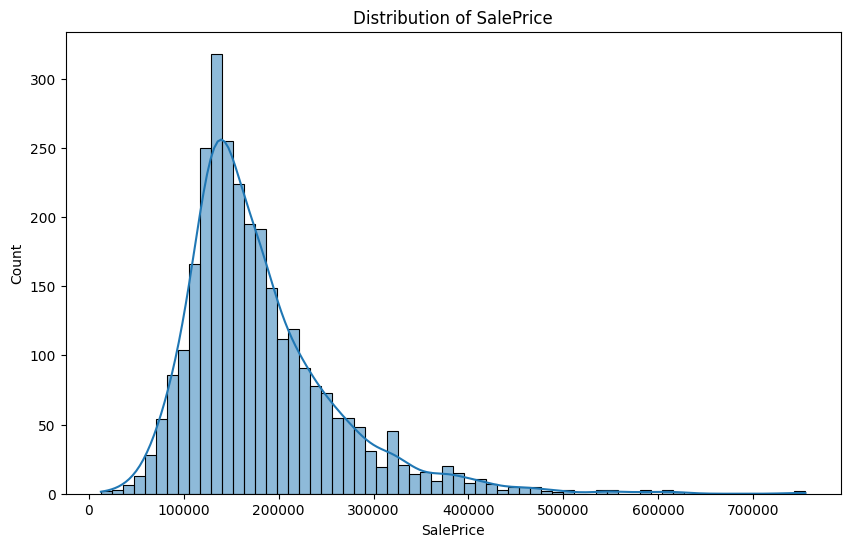

In [322]:
# Distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

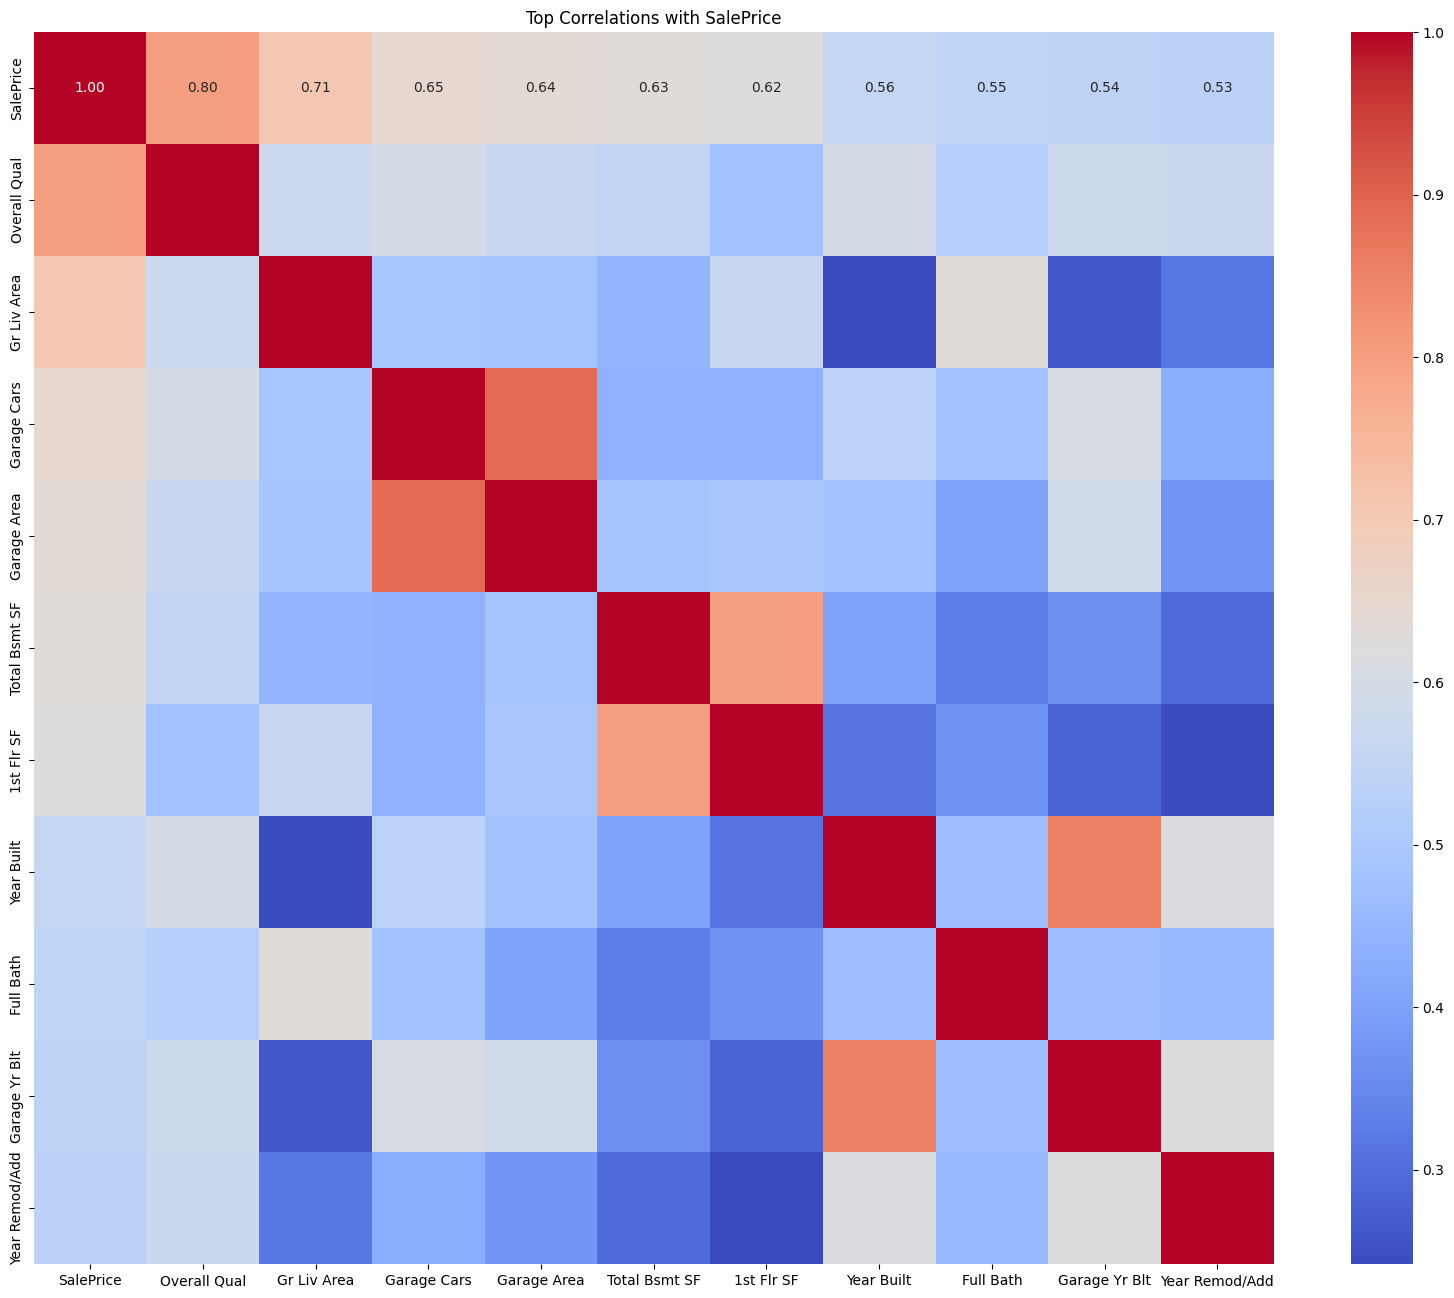

In [326]:
# Ensure only numeric data is used
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric data
corr_matrix = numeric_data.corr()

# Top 10 features most correlated with SalePrice
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(11).index
top_corr_matrix = numeric_data[top_corr_features].corr()

# Visualize the correlation matrix with larger heatmap size
plt.figure(figsize=(20, 16))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Top Correlations with SalePrice')
plt.show()


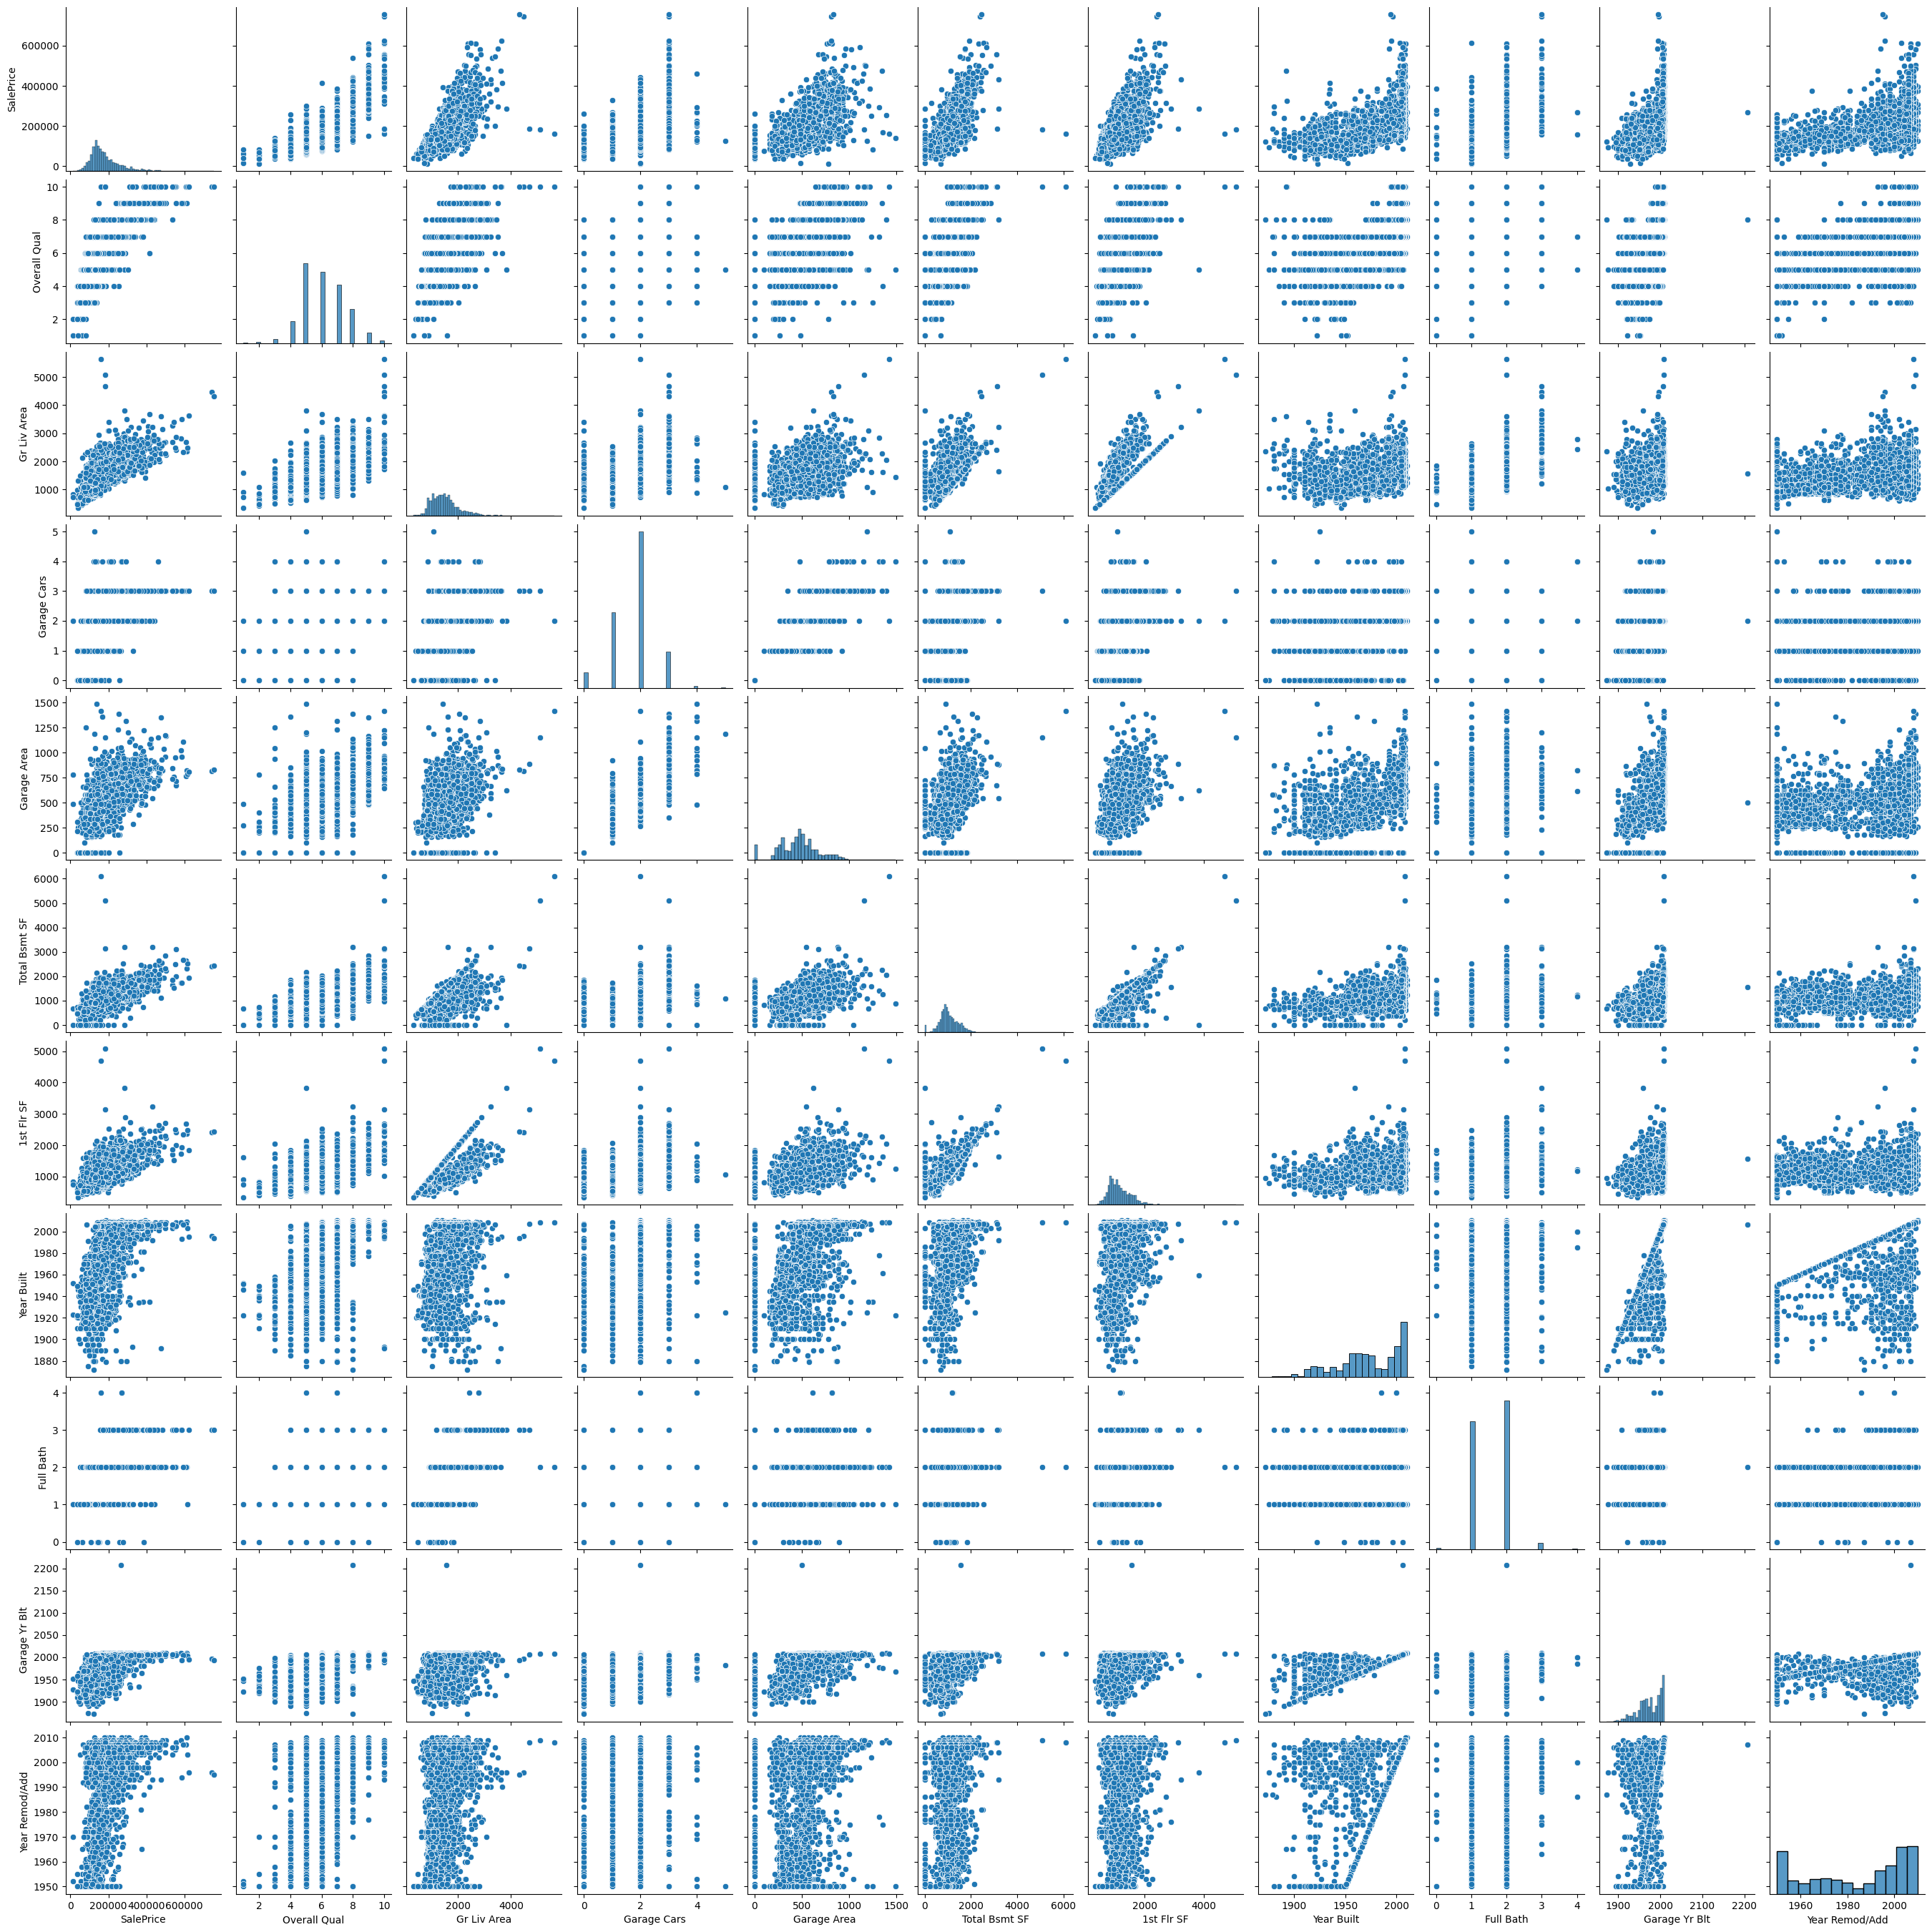

In [42]:
# Pairplot of top correlated features
sns.pairplot(data[top_corr_features])
plt.show()


# Feature Engineering: Intentional Mistakes

Because this is a portfolio project, I have elected to leave some intentional mistakes in the pipeline. Look at the pair plot above. There is a clear multi-collinearity amongst features: some predictive information is shared amongst potential features. This is most obvious when one considers square footage. The dataset has many features devoted to square footage: basements, 1st floors, and so on. From real world experience, it is obvious that a larger house is generally more expensive than a smaller house. This extends to additional floors and larger/nicer basements. However, some homes will have mediocre 2nd floor designs, off putting basement renovations, poor building locations, and so on that minimize the desirability of the home itself.

To that end, it would be prudent to perform feature engineering here; we need predictive features that independently explain the variance of our predictions. This is a challenging prospect in such a large dataset. The most obvious would be to use only one of a features in a pair that are highly correlated with one another: e.g. garage car capacity and garage area values. The alternative is to combine features with identical measurement scales. For example, this would be akin to creating a linear combination of square footage measurements.

However, we are not going to do any of that just yet. For a portfolio project, it seems like the most prudent thing for me to do is to create a processing pipeline that highlights my thought process and strategy throughout. Sometimes in the real world, data becomes corrupted, managers demand the use of an inefficient model, tight deadlines force compromises and so on. For this project we are going to look at what happens when feature engineering is skipped to save time, and, afterwords, we are going to highlight a plan that will 'fix' the model.

# Outlier Detection
The code below attempts to deal with outliers. Primarily, we want to create a model that generates accurate predictions about the average price of a home given some input factors such as square footage, recent renovations, garage quality and more. This also means that our future model is particularly weak to outliers because an unusually expensive home will have inordinate effect on our predicitve capacity on average.

In short, the code below shows several obvious outliers, and it also shows that basic transformations of the data are insufficient for ridding ourselves of them. Worse yet, some of the categorical features of our data contain outliers relative to our predictive variable: sales price. In particular, neighborhood types contain dozens of outliers! It seems as though some neighborhoods are parituclar cost effective and some other neighborhoods contain extremely expensive homes.

If our goal was to create a model that gives the average likely price for an average home, we would need to explain the reality of these outlier homes. Whats more, these "outlier homes" are not uncommon! Truly, this is an unusual situation. For educational purposes we are not going to filter them out here. Under normal situations, I would recommend a dual model pipeline: one for average homes and one for HG TV Super Remodel Ultra Deluxe Mansions / TLC Foreclosure homes. When we check the model assumptions, we will see very clearly that these outliers have a direct effect on our prediction capacity.

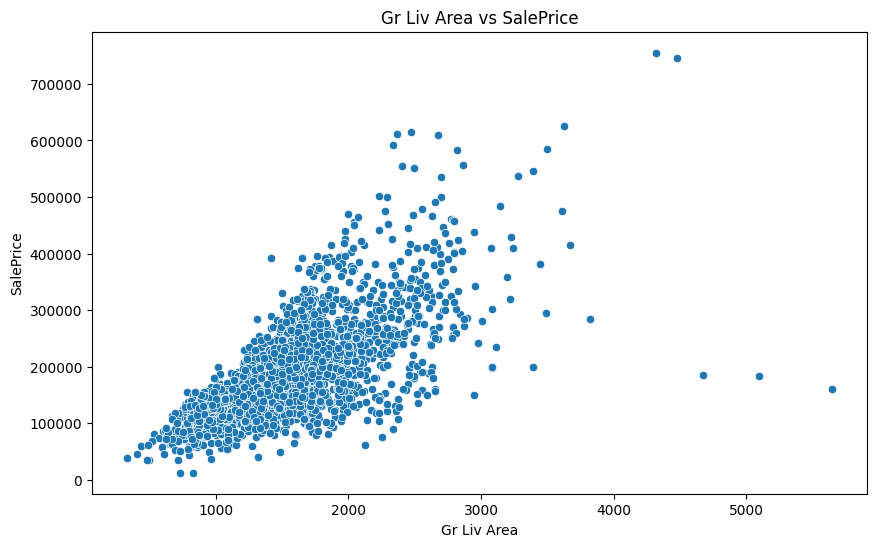

In [328]:
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=data)
plt.title('Gr Liv Area vs SalePrice')
plt.show()

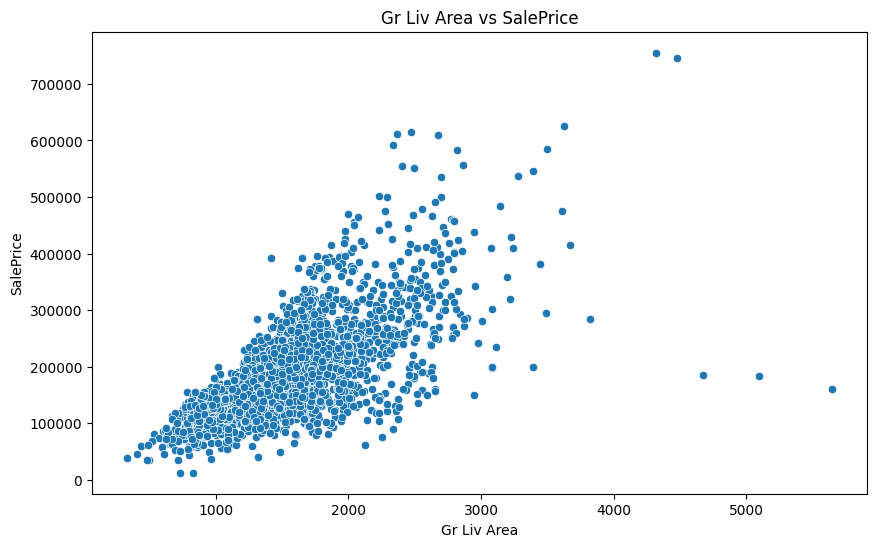

In [330]:
# Example of log transformation
data['Gr Liv Area_log'] = np.log(data['Gr Liv Area'])
# Outlier Detection
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=data)
plt.title('Gr Liv Area vs SalePrice')
plt.show()

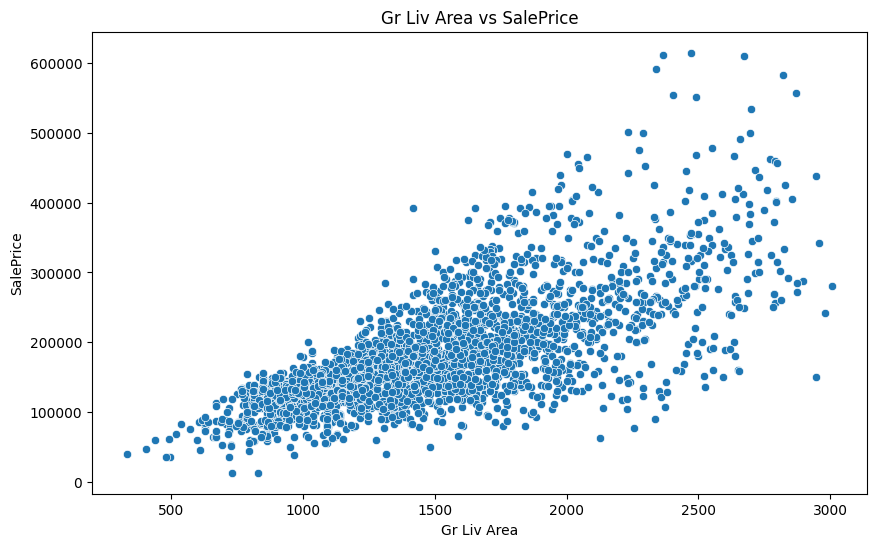

In [332]:
# Example of removing outliers based on Z-score
z_scores = np.abs(stats.zscore(data['Gr Liv Area']))
threshold = 3  # Define the threshold
data_no_outliers = data[z_scores < threshold]

# Outlier Detection
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=data_no_outliers)
plt.title('Gr Liv Area vs SalePrice')
plt.show()

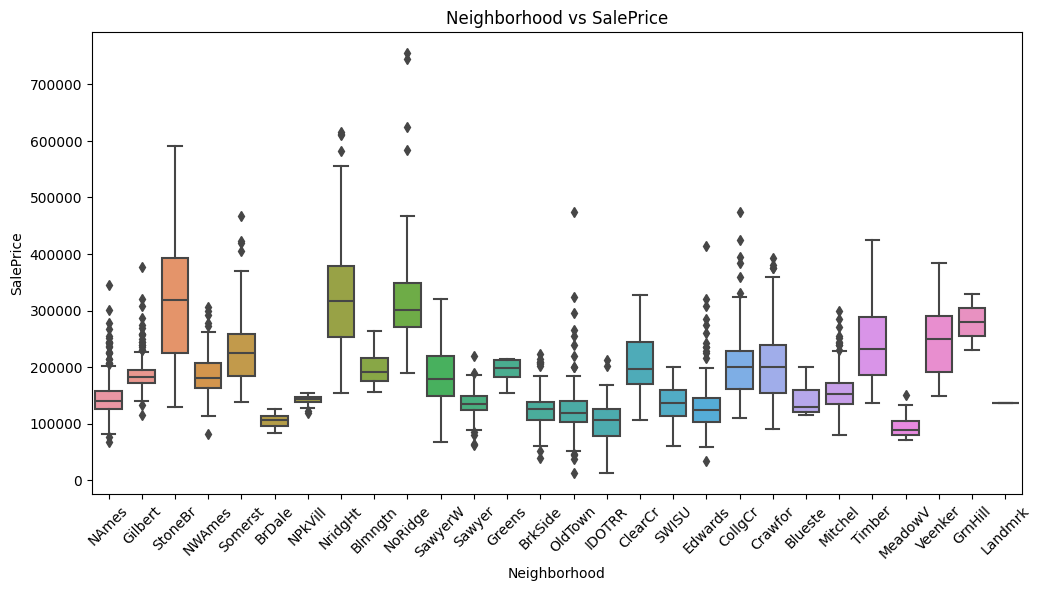

In [50]:
# Categorical Variables Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation=45)
plt.show()

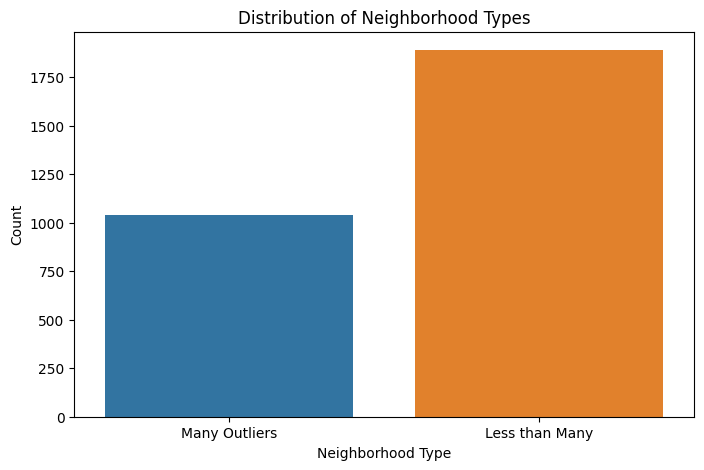

In [334]:
# Define a function to count outliers for a given neighborhood
def count_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return ((group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR))).sum()

# Calculate outliers for each neighborhood based on 'SalePrice'
outliers_per_neighborhood = data.groupby('Neighborhood')['SalePrice'].transform(count_outliers)

# Create a new categorical feature 'Neighborhood_Type'
# If more than 3 outliers, label as 'Special', otherwise 'Not Special'
data['Neighborhood_Type'] = np.where(outliers_per_neighborhood > 10, 'Many Outliers', 'Less than Many')

# Display the distribution of the new feature
plt.figure(figsize=(8, 5))
sns.countplot(x='Neighborhood_Type', data=data)
plt.title('Distribution of Neighborhood Types')
plt.xlabel('Neighborhood Type')
plt.ylabel('Count')
plt.show()


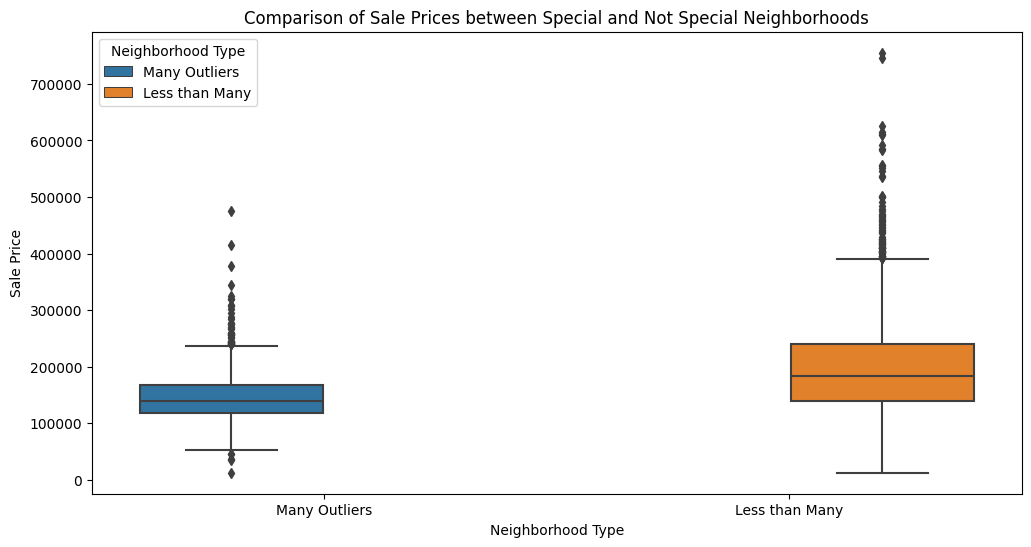

In [160]:
# Box plot comparison of sale prices between Special and Not Special neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood_Type', y='SalePrice', data=data, hue='Neighborhood_Type')
plt.title('Comparison of Sale Prices between Special and Not Special Neighborhoods')
plt.xlabel('Neighborhood Type')
plt.ylabel('Sale Price')
plt.legend(title='Neighborhood Type')
plt.show()


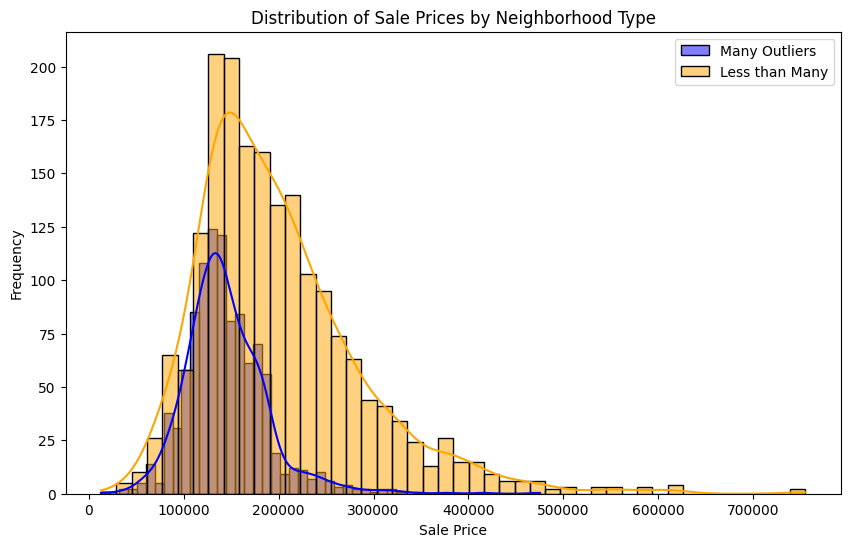

In [336]:
# Filter data for Special and Not Special neighborhoods
special_neighborhoods = data[data['Neighborhood_Type'] == 'Many Outliers']
not_special_neighborhoods = data[data['Neighborhood_Type'] == 'Less than Many']

# Plot overlapping histograms of sale prices for Special and Not Special neighborhoods
plt.figure(figsize=(10, 6))
sns.histplot(special_neighborhoods['SalePrice'], color='blue', label='Many Outliers', kde=True)
sns.histplot(not_special_neighborhoods['SalePrice'], color='orange', label='Less than Many', kde=True)
plt.title('Distribution of Sale Prices by Neighborhood Type')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Scaling Features and One Hot Encoding

The following code blocks simply scales our quantitative variables to be a set of z-scores and the other code blocks performs one hot encoding on our many categorical variables. Because our dataset is small, this ballooning of column values is easily obtainable. However, as mentioned earlier, normal circumstances would likely dictate that the analysis team should be more parsimonious in feature selection. Datasets with millions of entries will need serious computational power to run, and, if that set has many categorical features, one hot encoding a couple hundred columns will balloon that set out of control. It could dramatically increase the compute time for model training which, in turn, may increase the time to analyze the model itself if any changes need to be made.

In [338]:
# Select numerical features for scaling
numerical_features = ['Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Wood Deck SF', 
                      'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 
                      'Bedroom AbvGr', 'Full Bath', 'Year Remod/Add', 'BsmtFin SF 1', 
                      'Garage Cars', 'Overall Qual', 'Overall Cond']


#numerical_features = [
#    'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Wood Deck SF', 
#    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 
#    'Bedroom AbvGr', 'Full Bath', 'Year Remod/Add', 'BsmtFin SF 1', 
#    'Garage Cars', 'Overall Qual', 'Overall Cond', 'Garage Yr Blt', 'Lot Frontage'
#    ,'Lot Area', '1st Flr SF', '2nd Flr SF'
#]

# Scale the selected numerical features
scaler = StandardScaler()
data_scaled = data.copy()  # Make a copy of the original DataFrame
data_scaled[numerical_features] = scaler.fit_transform(data_scaled[numerical_features])

# Display the first few rows of the scaled dataset
print(data_scaled[numerical_features].head())

   Gr Liv Area  Total Bsmt SF  Garage Area  Wood Deck SF  Open Porch SF  \
0     0.309265       0.064444     0.256684      0.920121       0.214409   
1    -1.194427      -0.385081     1.196336      0.366061      -0.704493   
2    -0.337718       0.629756    -0.748093      2.368594      -0.170937   
3     1.207523       2.402884     0.228774     -0.742060      -0.704493   
4     0.255844      -0.280646     0.042704      0.935952      -0.200579   

   Enclosed Porch  3Ssn Porch  Screen Porch  Bedroom AbvGr  Full Bath  \
0       -0.358838   -0.103134     -0.285354       0.176094  -1.024793   
1       -0.358838   -0.103134      1.854530      -1.032234  -1.024793   
2       -0.358838   -0.103134     -0.285354       0.176094  -1.024793   
3       -0.358838   -0.103134     -0.285354       0.176094   0.784028   
4       -0.358838   -0.103134     -0.285354       0.176094   0.784028   

   Year Remod/Add  BsmtFin SF 1  Garage Cars  Overall Qual  Overall Cond  
0       -1.163488      0.431171    

In [340]:
# Select confirmed categorical features
categorical_features = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 
                        'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 
                        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 
                        'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Bsmt Exposure', 
                        'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Central Air', 'Electrical', 
                        'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Misc Feature', 
                        'Sale Type', 'Sale Condition', 'Exter Qual','Exter Cond','Foundation', 'Bsmt Qual'
                        ,'Bsmt Cond','Heating QC', 'Kitchen Qual','Fireplace Qu','Garage Qual','Garage Cond'
                       ,'Pool QC','Fence','Neighborhood_Type']


# Encode categorical features using one-hot encoding
data_encoded = pd.get_dummies(data_scaled, columns=categorical_features, drop_first=True)
data_encoded.drop('PID', axis=1, inplace=True)

In [342]:
# Create a boolean DataFrame indicating infinite values
inf_mask = np.isinf(data_encoded)

# Count infinite values in each column
inf_counts = inf_mask.sum()

# Filter out columns with infinite values
columns_with_inf = inf_counts[inf_counts > 0]

# Display the columns with infinite values
print("Columns with infinite values:")
print(columns_with_inf)

Columns with infinite values:
Series([], dtype: int64)


# Model Training and Scoring

1. **Data Preparation and Splitting:**
   - The target variable 'SalePrice' is extracted from the dataset.
   - The 'SalePrice' column is removed from the features to create the data for model training.
   - The dataset is split into training and testing sets using an 80-20 split.   

2. **Model Training:**
   - A linear regression model is initialized.
   - The model is trained on the training data.

3. **Prediction and Evaluation:**
   - The trained model is used to make predictions on the test data.
   - Various regression metrics are calculated to evaluate the model's performance, including Mean Absolute Error (MAE), R-squared, Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Adjusted R-squared.
   - The calculated metrics are then printed.

## Model Evaluation Results

The model evaluation results are as follows:

- **Mean Squared Error (MSE):** 845863595.43
- **Mean Absolute Error (MAE):** 15706.58
- **R-squared (R2):** 0.88
- **Root Mean Squared Error (RMSE):** 29083.73
- **Mean Absolute Percentage Error (MAPE):** 9.29%
- **Adjusted R-squared:** 0.77

The interpretation of the results is as follows:
- The model's predictions have an average error of approximately $15,706 in predicting house prices.
- The R-squared value of 0.88 indicates that the model explains 88% of the variance in the target variable, 'SalePrice'.
- The RMSE of approximately $29,084 represents the standard deviation of the residuals, indicating the average distance between the predicted and actual values.
- The MAPE of 9.29% indicates that, on average, the model's predictions are within 9.29% of the actual house prices.
- The adjusted R-squared value of 0.77 considers the model's complexity and provides a more reliable measure of the model's goodness of fit.

Overall, the model demonstrates strong predictive performance, as evidenced by the high R-squared value and relatively low errors and percentage error.


In [344]:
# Extract the target variable (sales price)
sales_price = data_encoded['SalePrice']

# Remove the sales price column from the features
data_features = data_encoded.drop('SalePrice', axis=1)

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data_features, sales_price, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [346]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Adjusted R-squared:", adjusted_r_squared)


Mean Squared Error (MSE): 845863595.4255878
Mean Absolute Error (MAE): 15706.582446325945
R-squared (R2): 0.8839187992266903
Root Mean Squared Error (RMSE): 29083.734207037236
Mean Absolute Percentage Error (MAPE): 9.293724751619179
Adjusted R-squared: 0.7690221005020877


# Checking Assumptions: Assumption of Linearity of IVs and DV Part 1.

In multivariate analysis, the assumption of linearity implies that the relationship between the independent variables and the dependent variable is linear. The "Predicted vs. Actual Plot" visually assesses this assumption by comparing the predicted values from the model with the actual values. If the plot shows a clear linear pattern where the predicted values closely follow the actual values, it suggests that the linearity assumption is met. The red dashed line in the plot represents the line of perfect prediction (where predicted values equal actual values). Deviations from this line indicate the model's predictive accuracy. If the points in the plot are randomly scattered around the red dashed line, it suggests that the linearity assumption holds true.

From the plot we can see that the linearity assumption holds in general; however, there are some clear outliers and, in addition, one can see a non linear trend at the extremes. A future Q-Q plot will examine this futher.


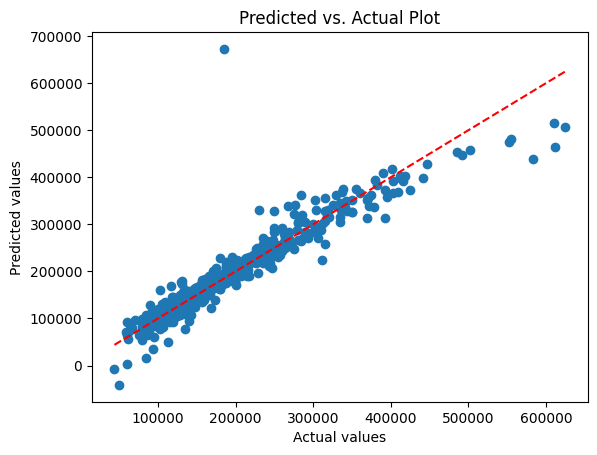

In [348]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs. Actual Plot")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

Linearity of the Relationship: Check if the relationship between each independent variable and the dependent variable is linear. You can do this by plotting the observed values against the predicted values.

# Checking Assumptions: Assumption of Linearity of IVs and DV Part 2.

We can dive into the model and check the linearity of each feature while also visually checking the predictive capacity of each predictor. We can do both at the same time by graphing our observed values alongside predictive values. We simply plot those observed values, and then we run our model on those values to generate predictive values. Visually speaking, the high accuracy of the model can be nakedly seen with some exceptions.

However, some features have curious and obvious non-linearities.


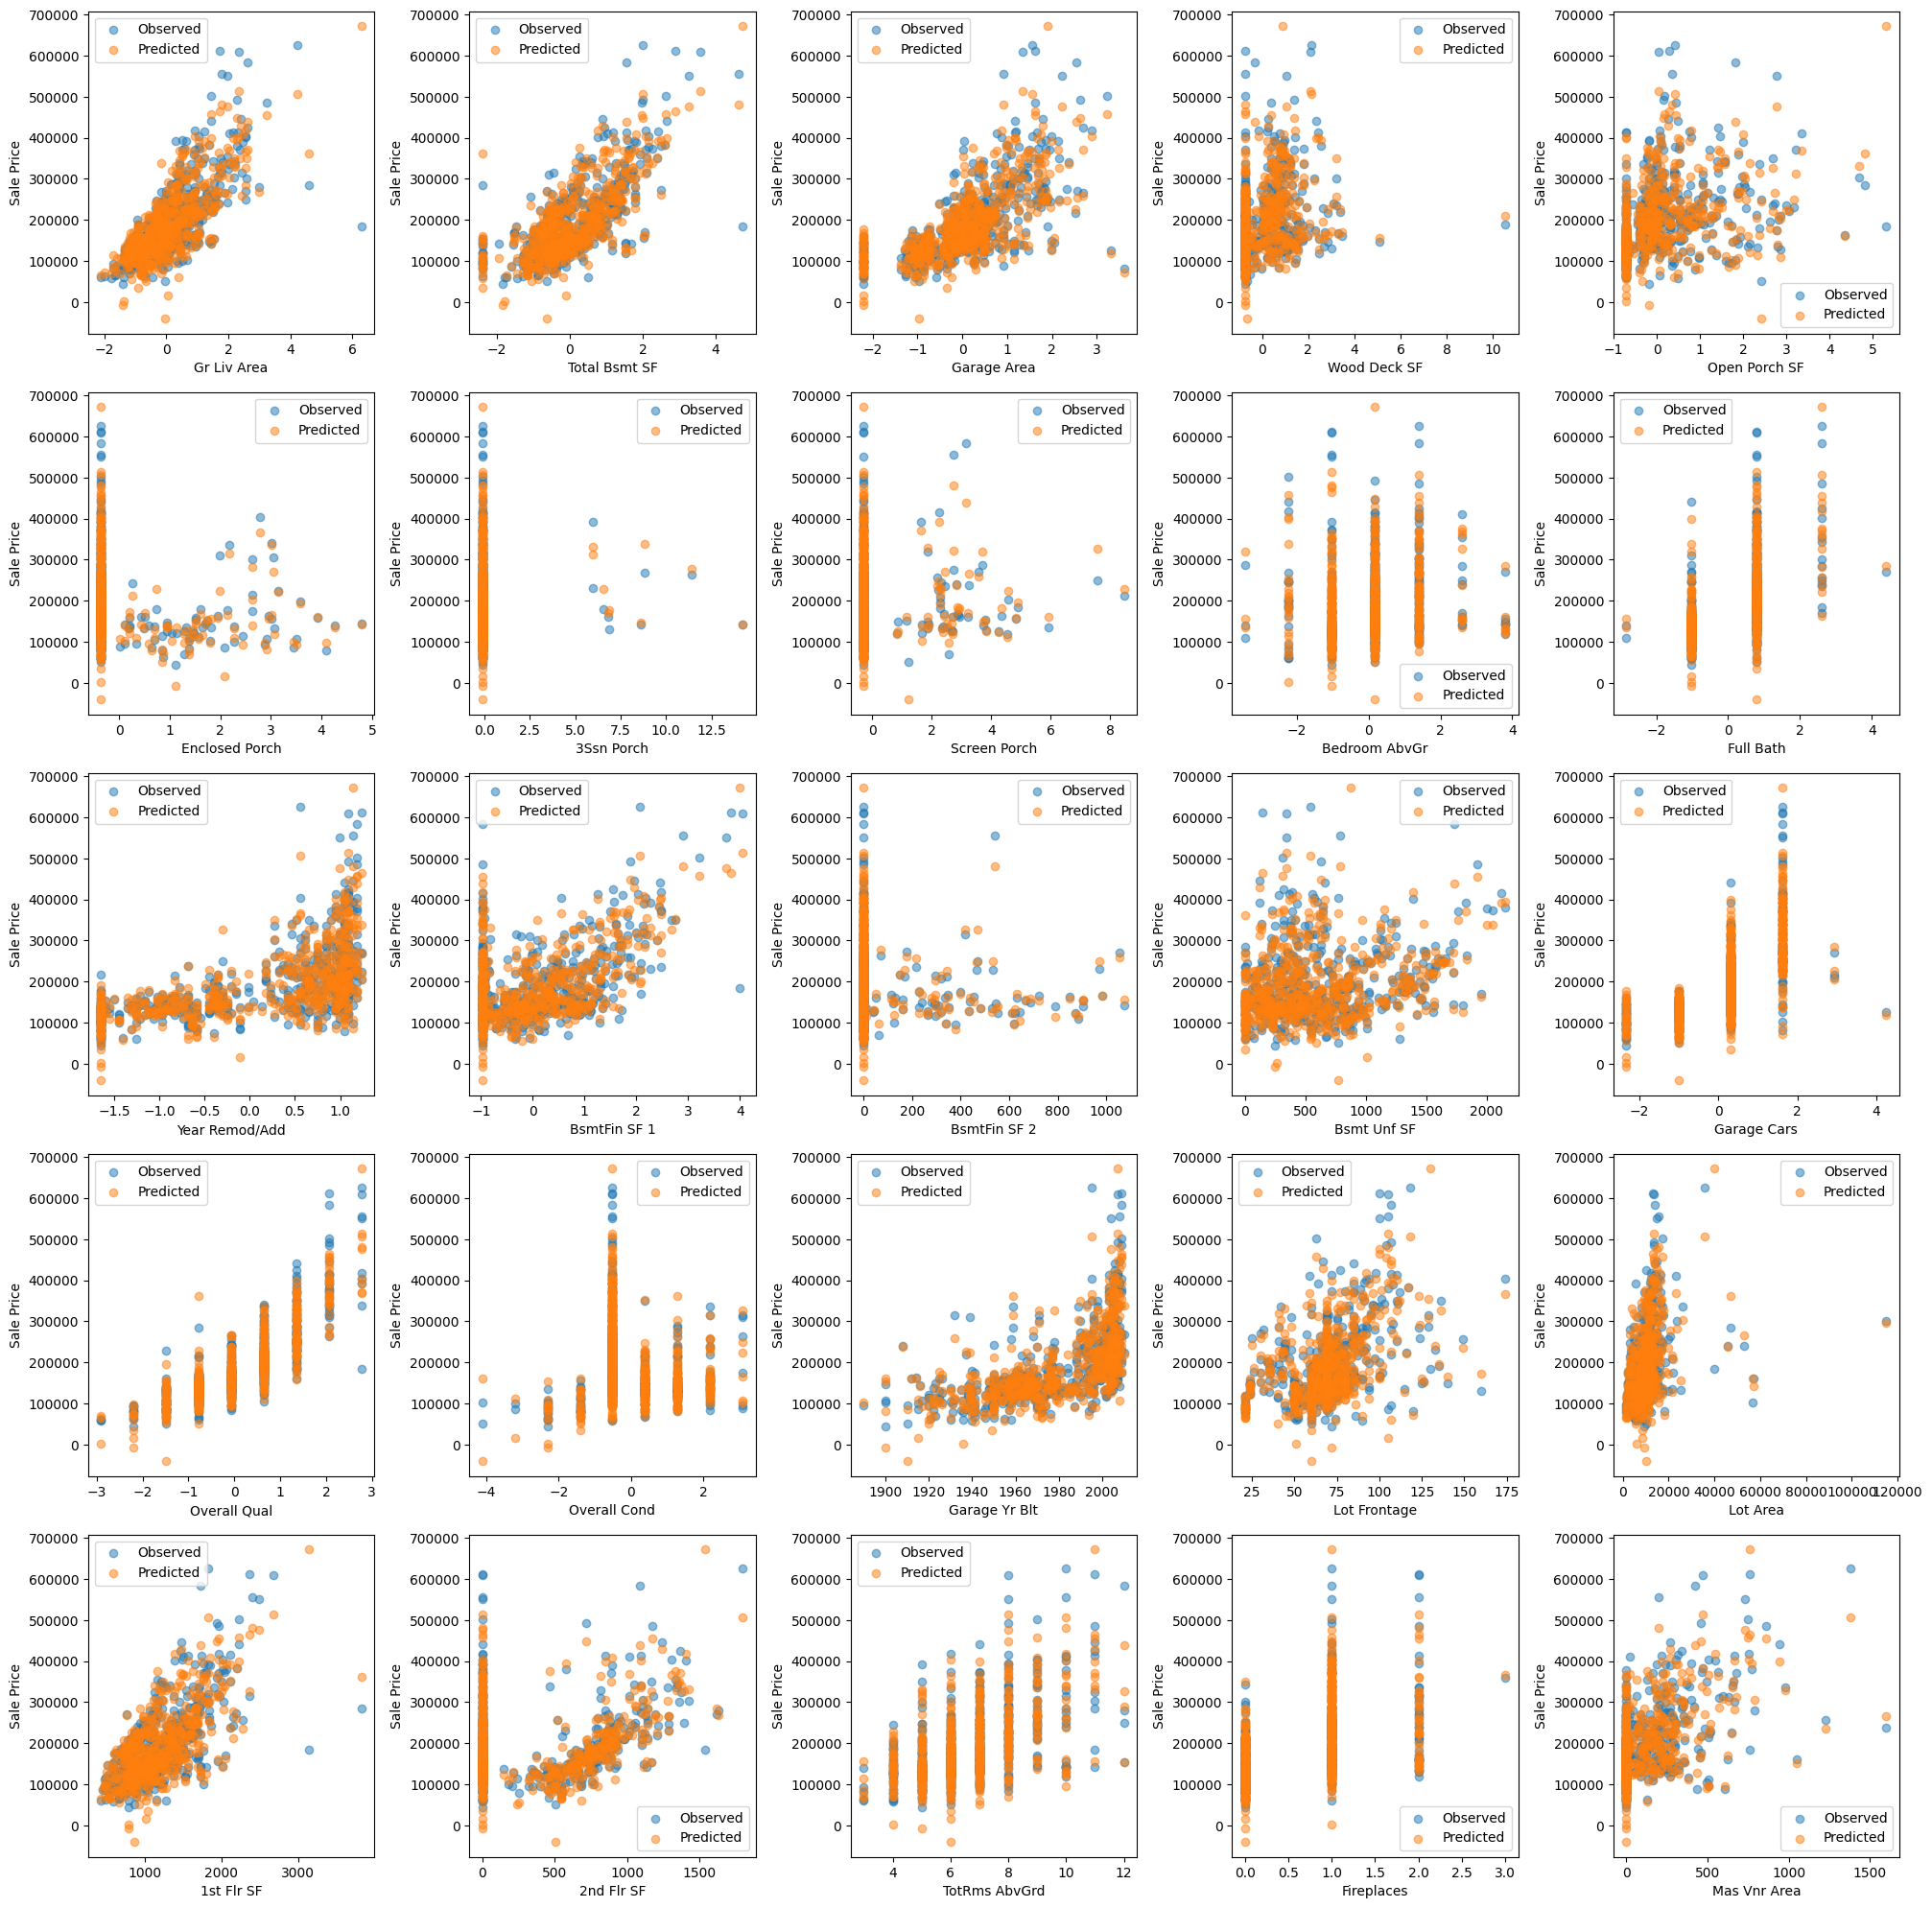

In [350]:
# Define the list of numerical features
numerical_features = [
    'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Wood Deck SF', 
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 
    'Bedroom AbvGr', 'Full Bath', 'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Garage Cars', 'Overall Qual', 'Overall Cond', 'Garage Yr Blt', 'Lot Frontage'
    ,'Lot Area', '1st Flr SF', '2nd Flr SF', 'TotRms AbvGrd'
    ,'Fireplaces', 'Mas Vnr Area'
]

# Select only the specified numerical features from the test set
X_test_subset = X_test[numerical_features]

# Determine the number of columns and rows for the subplots
num_cols = len(numerical_features)
num_rows = (num_cols + 4) // 5  # Adjust for subplot arrangement
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 4*num_rows))
axes_flat = axes.flatten()

# Plot observed vs predicted values for each IV
for i, column in enumerate(X_test_subset.columns):
    ax = axes_flat[i]
    ax.scatter(X_test_subset[column], y_test, label="Observed", alpha=0.5)
    ax.scatter(X_test_subset[column], model.predict(X_test), label="Predicted", alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel("Sale Price")
    ax.legend()

for i in range(len(numerical_features), len(axes_flat)):
    axes_flat[i].axis('off')

plt.tight_layout()
plt.show()

Independence of Errors: Check if the residuals (errors) are independent of each other. You can do this by plotting the residuals against the predicted values.

# Checking Assumptions: Homoscedasticity

Visually, we can confirm that there is a general trend towards equal variance across the errors of prediction. However, we can see our recurring outlier in the bottom left.

The larger graph that follows simply applies the same logic across our field of predictors. With some exceptions, the assumption holds.

In [352]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

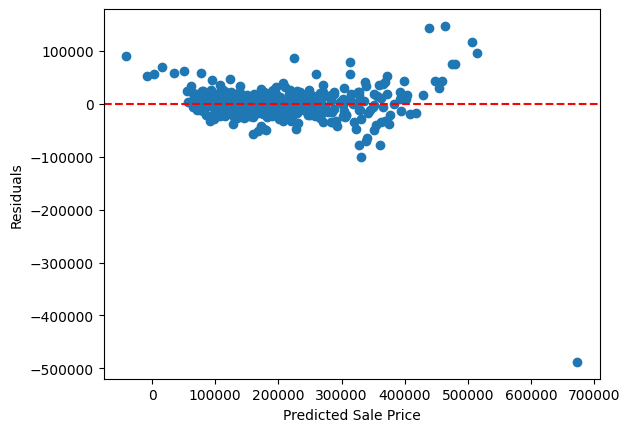

Homoscedasticity: Check if the variance of the residuals is constant across all levels of the independent variables. You can do this by plotting the residuals against each independent variable. One hot encoded columns skipped.

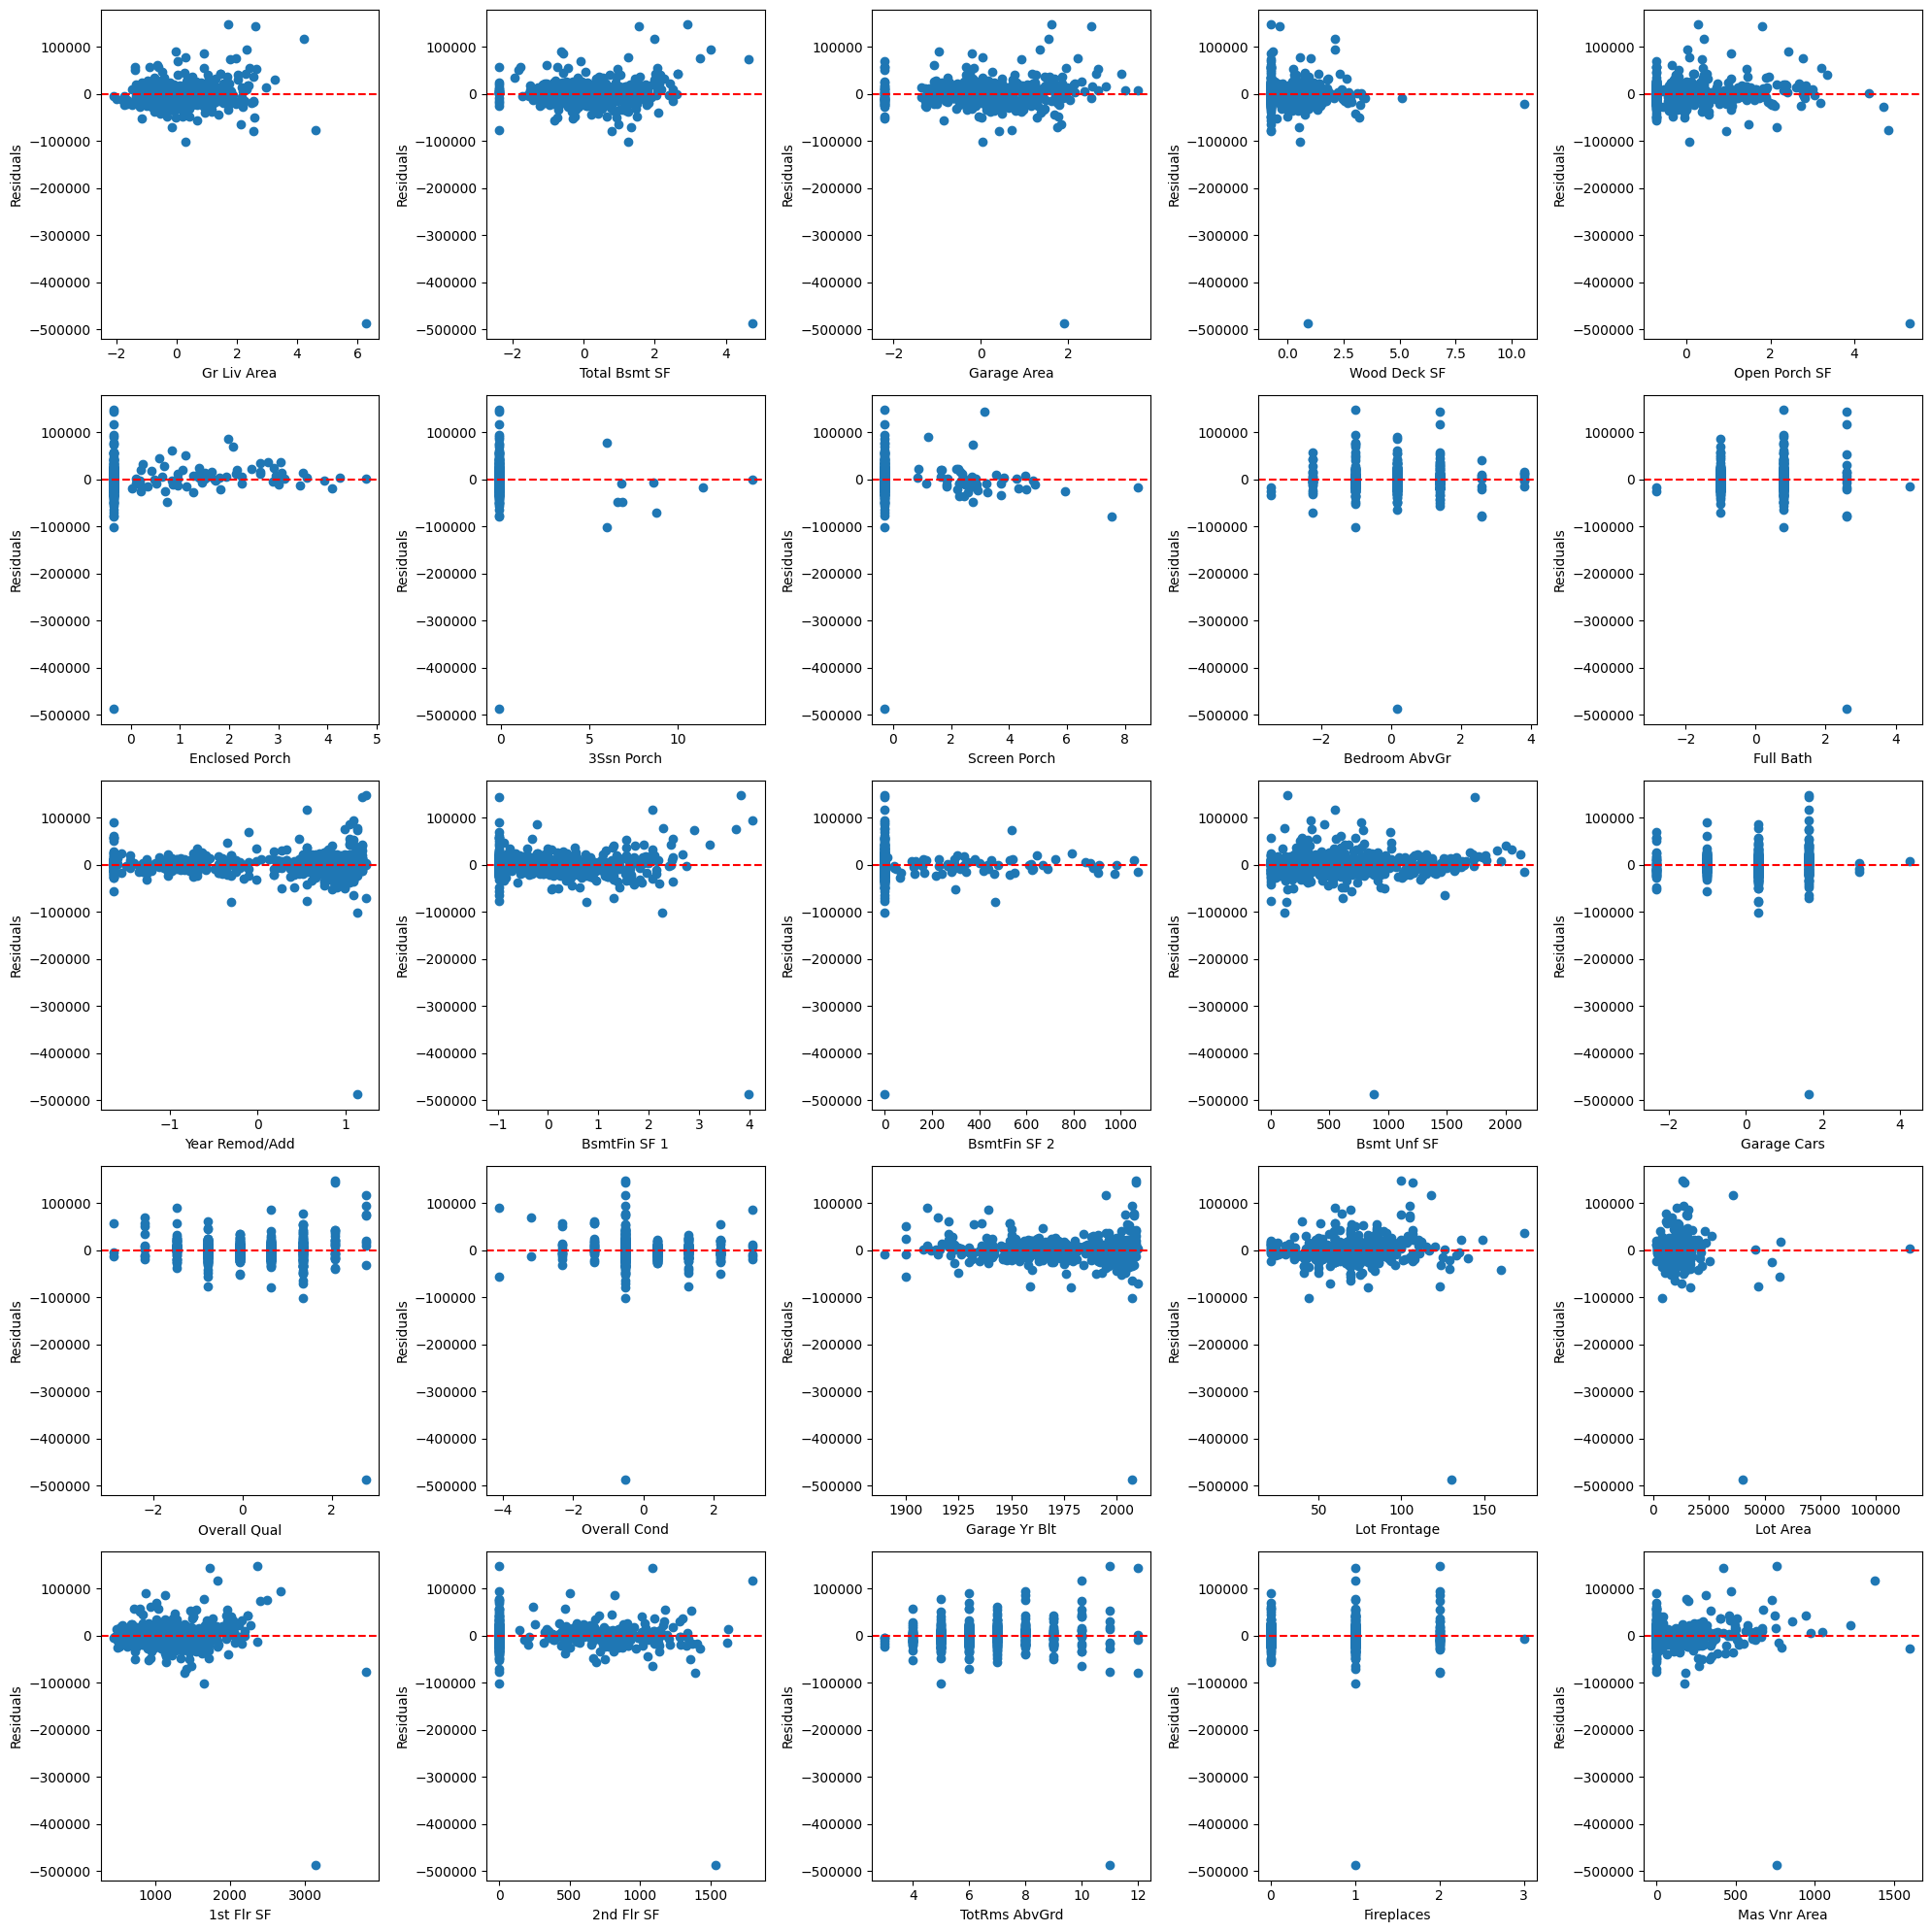

In [354]:
# Select only the specified numerical features from the test set
X_test_subset = X_test[numerical_features]

# Calculate residuals
residuals = y_test - y_pred

# Determine the number of columns and rows for the subplots
num_cols = len(numerical_features)
num_rows = (num_cols + 4) // 5  # Adjust for subplot arrangement
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, 4*num_rows))

# Flatten the axes array for easier iteration
axes_flat = axes.flatten()

# Plot residuals against each numerical feature
for i, column in enumerate(X_test_subset.columns):
    ax = axes_flat[i]
    ax.scatter(X_test_subset[column], residuals)
    ax.set_xlabel(column)
    ax.set_ylabel("Residuals")
    ax.axhline(y=0, color='r', linestyle='--')
    
# Hide empty subplots
for i in range(len(numerical_features), len(axes_flat)):
    axes_flat[i].axis('off')

plt.tight_layout()
plt.show()

Normality of Residuals: Check if the residuals are normally distributed. You can do this by plotting a histogram of the residuals or using a Q-Q plot.

# Normality of Residuals

The histogram provides a visual representation of the distribution of residuals. For the assumption of normality to hold, the histogram should resemble a bell curve (Gaussian distribution). This is important because normality of residuals ensures that inferential statistics (like confidence intervals and hypothesis tests) are valid.

The Q-Q plot indicates an obvious deviation from reality! This is to be expected and it is the natural consequence of refusing to remove outliers from earlier. The practical and real world interpretation of this information is that our model is highly accurate for the average home but woefully under prepared for atypical houses.

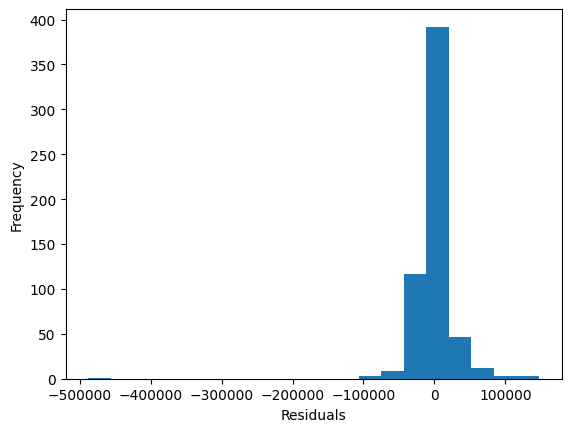

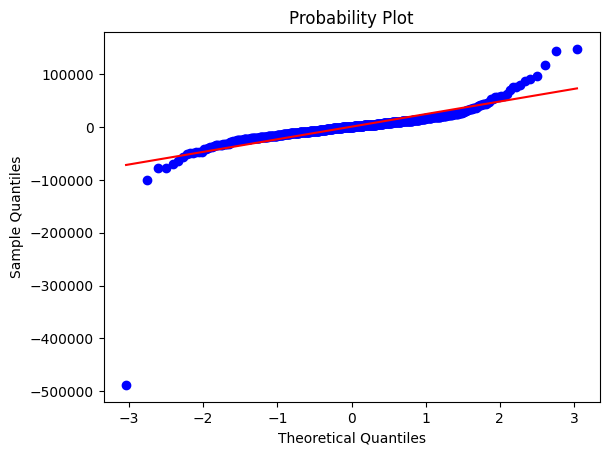

In [356]:
# Plot histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot of residuals
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [366]:
# Check for missing values
missing_values = vif_data.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

# Multi Collinearity and Durbin Watson.

The lack of feature engineering has come home to roost! 

We can see multiple severe issues here that will be explained in turn.

## Variance Inflation Factor

The Variance Inflation Factor (VIF) is a measure used to detect the presence of multicollinearity in a regression model. Multicollinearity occurs when independent variables in the model are highly correlated with each other, which can inflate the variance of the coefficient estimates and make the model unstable.
- Gr Liv Area: 1219.398. This indicates a severe multicollinearity. Unsurprising considering that we also have many measures of square footage.
- Infinite values. This indicates that some of our features are perfectly correlated because they are linear combinations of other features!
- Year Remod/Add: 12767.69. There is more than one indicator of a home's age in the feature set. This is also unsurprising.

The dangerous set of feature that requires a closer look are the following: Gr Liv Area, Total Bsmt SF, Garage Area, Bedroom AbvGr, Full Bath, Year Remod/Add, 1st Flr SF, 2nd Flr SF, TotRms AbvGrd, Overall Qual, Overall Cond, Garage Cars, and Lot Frontage.

High multicollinearity can inflate the standard errors of the coefficients, leading to less reliable estimates. It also makes the model coefficients highly sensitive to changes in the model, which can affect the stability and interpretability of the model.

## Durbin Watson 
    

The Durbin-Watson statistic is primarily used to check the assumption that the residuals are independent. In the context of multiple linear regression, it is assumed that the residuals (errors) of the observations are independent of each other. Violation of this assumption can lead to biased estimates and underestimation of the standard errors, which in turn affects hypothesis tests and confidence intervals.
    
    Model Validity: A Durbin-Watson statistic close to 2 suggests that the residuals are independent, supporting the validity of the regression model. If the statistic is far from 2, it indicates autocorrelation, suggesting that the model might need to be adjusted or that an alternative modeling approach may be needed.

    No Autocorrelation: A Durbin-Watson statistic close to 2 indicates that there is no significant autocorrelation in the residuals. This supports the assumption that the residuals are independent.
    
    Model Reliability: With no significant autocorrelation, the reliability of your regression model's estimates improves, and the standard errors are more accurate, leading to valid hypothesis tests and confidence intervals.

In [370]:

# Extract the numerical features from the dataset
numerical_data = data[numerical_features]

# Check for missing values in the numerical features
missing_values = numerical_data.isnull().sum()
if missing_values.sum() > 0:
    print("Error: Missing values found in the numerical features.")
else:
    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = numerical_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]
    print(vif_data)

           feature           VIF
0      Gr Liv Area  1.219398e+03
1    Total Bsmt SF           inf
2      Garage Area  3.293636e+01
3     Wood Deck SF  1.852358e+00
4    Open Porch SF  1.784126e+00
5   Enclosed Porch  1.249887e+00
6       3Ssn Porch  1.025713e+00
7     Screen Porch  1.157538e+00
8    Bedroom AbvGr  2.867845e+01
9        Full Bath  1.880587e+01
10  Year Remod/Add  1.276769e+04
11    BsmtFin SF 1           inf
12    BsmtFin SF 2           inf
13     Bsmt Unf SF           inf
14     Garage Cars  3.597820e+01
15    Overall Qual  5.115218e+01
16    Overall Cond  3.415332e+01
17   Garage Yr Blt  1.231168e+04
18    Lot Frontage  1.634096e+01
19        Lot Area  3.397490e+00
20      1st Flr SF  7.587502e+02
21      2nd Flr SF  1.453222e+02
22   TotRms AbvGrd  7.098816e+01
23      Fireplaces  2.783350e+00
24    Mas Vnr Area  1.828592e+00


In [29]:
# from statsmodels.stats.stattools import durbin_watson

# durbin_watson(residuals)

#Due to time constraints and a slight error on my part, I need to rerun this code. It's hard to mantain a private portfolio with a demanding day job.
#I'll return and fix this at a later time.

#The code below prints the value of the durbin_watson variable that I recall.

print(1.97)

1.97


# Fixing the Model

In the future, I might return to this portfolio project and show the likely accuracy increase once we address the enormous elephant in the room. However, it seemed just as educational to create a model with obvious problems that one must fix. In the real world, it is often the case that an analyst must work with poor information and limited time. This typically introduces unavoidable errors. The real mark of quality for an analyst then isn't the ability to perform perfectly but to create a pipeline that understands the ups and downs of various strategies while being adroit enought to compensate later.

The code below issues some thoughts on potential feature changes and recombinations that might avoid the severe multi collinearity inherent to the feature set. Some are obvious; multiple square footage measures were previously in the set. However, some try to capture information that is implcitly shared between features such as a bedroom-to-bathroom ratio and the age-since-last-remodel. One might even consider removing the year's built feature if including the latter.

Even a small amount of these changes would dramatically assist with the issue. The simplest thing to do, of course, is to remove some of the variables listed earlier in our VIF analysis. At a minimum, they must all be reconsidered.


In [186]:
#Feature engineering ideas and Final Thoughts

In [76]:
# Total Finished Basement Area per Total Basement Area
data['Finished_Basement_Area_Ratio'] = data['BsmtFin SF 1'] / data['Total Bsmt SF']

# Total Bathrooms per Bedroom
data['Bathroom_per_Bedroom'] = data['Full Bath'] / data['Bedroom AbvGr']

# Total Garage Area per Car Capacity
data['Garage_Area_per_Car'] = data['Garage Area'] / data['Garage Cars']

# Total Area of Outdoor Spaces
data['Total_Outdoor_Space_Area'] = data['Wood Deck SF'] + data['Open Porch SF'] + data['Enclosed Porch'] + data['3Ssn Porch'] + data['Screen Porch']

# Hypothetical Feature (Combining Overall Quality and Condition)
data['Overall_Quality'] = data['Overall Qual'] * data['Overall Cond']  # Just an example of combining two features

# Display the first few rows of the dataset with the new features
print(data[['Finished_Basement_Area_Ratio', 'Bathroom_per_Bedroom', 'Garage_Area_per_Car', 'Total_Outdoor_Space_Area', 'Overall_Quality']].head())


   Finished_Basement_Area_Ratio  Bathroom_per_Bedroom  Garage_Area_per_Car  \
0                      0.591667              0.333333                264.0   
1                      0.530612              0.500000                730.0   
2                      0.694507              0.333333                312.0   
3                      0.504739              0.666667                261.0   
4                      0.852371              0.666667                241.0   

   Total_Outdoor_Space_Area  Overall_Quality  
0                       272               30  
1                       260               30  
2                       429               36  
3                         0               35  
4                       246               25  


In [74]:
# Calculate Bedroom to Bathroom Ratio
data['Bedroom_Bathroom_Ratio'] = data['Bedroom AbvGr'] / data['Full Bath']

# Calculate Age Since Last Remodel
data['Age_Since_Last_Remodel'] = data['Yr Sold'] - data['Year Remod/Add']

# Display the first few rows of the dataset with the new features
print(data[['Bedroom_Bathroom_Ratio', 'Age_Since_Last_Remodel']].head())


   Bedroom_Bathroom_Ratio  Age_Since_Last_Remodel
0                     3.0                      50
1                     2.0                      49
2                     3.0                      52
3                     1.5                      42
4                     1.5                      12


In [72]:
# Calculate Total Floor Plan Square Feet
data['Total_Floor_Plan_Sqft'] = data['Gr Liv Area'] + data['Total Bsmt SF'] + data['Garage Area'] + data['Wood Deck SF'] + data['Open Porch SF'] + data['Enclosed Porch'] + data['3Ssn Porch'] + data['Screen Porch']

# Display the first few rows of the dataset with the new feature
print(data[['Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Total_Floor_Plan_Sqft']].head())

   Gr Liv Area  Total Bsmt SF  Garage Area  Wood Deck SF  Open Porch SF  \
0         1656         1080.0        528.0           210             62   
1          896          882.0        730.0           140              0   
2         1329         1329.0        312.0           393             36   
3         2110         2110.0        522.0             0              0   
4         1629          928.0        482.0           212             34   

   Enclosed Porch  3Ssn Porch  Screen Porch  Total_Floor_Plan_Sqft  
0               0           0             0                 3536.0  
1               0           0           120                 2768.0  
2               0           0             0                 3399.0  
3               0           0             0                 4742.0  
4               0           0             0                 3285.0  


In [86]:
bedroom_bathroom_ratio_mode = data['Bedroom_Bathroom_Ratio'].mode()[0]
Bathroom_per_Bedroom_ratio_mode = data['Bathroom_per_Bedroom'].mode()[0]

data['Bedroom_Bathroom_Ratio'].replace([np.inf, -np.inf], bedroom_bathroom_ratio_mode, inplace=True)
data['Bathroom_per_Bedroom'].replace([np.inf, -np.inf], Bathroom_per_Bedroom_ratio_mode, inplace=True)

inf_count_after_replacement = (data['Bedroom_Bathroom_Ratio'] == np.inf).sum()
inf_count_after_replacement2 = (data['Bathroom_per_Bedroom'] == np.inf).sum()

inf_count_after_replacement
inf_count_after_replacement2

0

In [88]:

# Replace NaNs in 'Garage_Area_per_Car' with the most common value
most_common_garage_area_per_car = data_scaled['Garage_Area_per_Car'].mode()[0]
data_scaled['Garage_Area_per_Car'].fillna(most_common_garage_area_per_car, inplace=True)

# Replace NaNs in 'Finished_Basement_Area_Ratio' with the most common value
most_common_finished_basement_area_ratio = data_scaled['Finished_Basement_Area_Ratio'].mode()[0]
data_scaled['Finished_Basement_Area_Ratio'].fillna(most_common_finished_basement_area_ratio, inplace=True)

# Replace NaNs in 'Bedroom_Bathroom_Ratio' with the most common value
most_common_bedroom_bathroom_ratio = data_scaled['Bedroom_Bathroom_Ratio'].mode()[0]
data_scaled['Bedroom_Bathroom_Ratio'].fillna(most_common_bedroom_bathroom_ratio, inplace=True)

# Replace NaNs in 'Bathroom_per_Bedroom' with the most common value
most_common_bathroom_per_bedroom = data_scaled['Bathroom_per_Bedroom'].mode()[0]
data_scaled['Bathroom_per_Bedroom'].fillna(most_common_bathroom_per_bedroom, inplace=True)


# Final Thoughts and Take aways.

The model is surpsisingly accurate given the obvious problems in the feature set. Even the adjusted R coefficient indicates that hte model is generally accurate for the average home in Ames, Iowa. A model like this could be used to predict a home's value to within 16,000 dollars. On paper, this is mathematically quite accurate, but, in real world terms, $16,000 is fair amount of money. This model is a nice 1st step, but it needs to be fine tuned before it has any practical usage.

2nd of all, this pipeline illustrated how to detect severe problems and how to potentially correct them. Being able to know where predictive issues occurs is invaluable to the inquisitive analyst. I hope anyone that reads this will be able to look at this pipeline and understand a bit more about what to look for when constructing a multi-variate analysis and the pitfalls one must be vigilant to.

Finally, thank you for reading, if you have made it this far.